## About the data

**Dataset 1**

Shipping intensity in the Pacific Arctic region during August 2017.
The value at each raster cell represents the total length in meters of all vessel tracks within each cell.
Resolution: 1 km per pixel

**Dataset 2**

Vector data showing statistical areas dividing waters of the State of Alaska and adjacent zone into small units for the purpose of reporting and analyzing fishery harvest.

Format: GeoPackage( extension .gpkg). OPen, non-proprietary, platform-independent, self-describing format. Supports both raster and vector data. 

**Dataset 3** 

A polygon showing Alaska's boundary extracted from the 2022 US Census Tiger shapefule, updated CRS.

In [2]:
# import libraries
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # for making legends 

import xarray as xr
import rioxarray as rioxr
import geopandas as gpd 

from rasterio.features import rasterize # for rasterizing polygons 


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# importing data 

raw_dist = rioxr.open_rasterio('https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A0d223f34-77fc-4ebe-8a58-459b7e575668')
raw_dist

<xarray.DataArray (band: 1, y: 2308, x: 3087)>
[7124796 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    _FillValue:          -3.4e+38
    scale_factor:        1.0
    add_offset:          0.0

In [6]:
# open fishing areas polygons 
fishing_areas = gpd.read_file(os.path.join(os.getcwd(),'data', 'Alaska_Commercial_Salmon_Boundaries.gpkg'))
fishing_areas.head()

,OBJECTID,GEOMETRY_START_DATE,GEOMETRY_END_DATE,STAT_AREA,STAT_AREA_NAME,FISHERY_GROUP_CODE,GIS_SERIES_NAME,GIS_SERIES_CODE,REGION_CODE,REGISTRATION_AREA_NAME,REGISTRATION_AREA_CODE,REGISTRATION_AREA_ID,REGISTRATION_LOCATION_ABBR,MANAGEMENT_AREA_NAME,MANAGEMENT_AREA_CODE,DISTRICT_NAME,DISTRICT_CODE,DISTRICT_ID,SUBDISTRICT_NAME,SUBDISTRICT_CODE,SUBDISTRICT_ID,SECTION_NAME,SECTION_CODE,SECTION_ID,SUBSECTION_NAME,SUBSECTION_CODE,SUBSECTION_ID,COAR_AREA_CODE,CREATOR,CREATE_DATE,EDITOR,EDIT_DATE,COMMENTS,STAT_AREA_VERSION_ID,Shape_Length,Shape_Area,geometry
0,12,1975-01-01 00:00:00+00:00,NaT,33461,Tanana River mouth to Kantishna River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-A Subdistrict,6-A,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-A Section ...",None,4.610183,0.381977,"MULTIPOLYGON (((-151.32805 64.96913, -151.3150..."
1,13,1975-01-01 00:00:00+00:00,NaT,33462,Kantishna River to Wood River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-B Subdistrict,6-B,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-B Section ...",None,3.682421,0.321943,"MULTIPOLYGON (((-149.96255 64.70518, -149.9666..."
2,18,1978-01-01 00:00:00+00:00,NaT,33431,Toklik to Cottonwood Point,B,Salmon,B,3,Yukon Area,Y,None,None,Lower Yukon,YL,3 District,Y-3,None,,None,None,None,None,NaN,None,None,None,YL,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,Yukon District and 3 Subdistrict until 1/1/1980,None,2.215641,0.198740,"MULTIPOLYGON (((-161.39853 61.55463, -161.4171..."
3,19,1980-01-01 00:00:00+00:00,NaT,33442,"Right Bank, Bishop Rock to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.179852,0.382788,"MULTIPOLYGON (((-153.15234 65.24944, -153.0761..."
4,20,1980-01-01 00:00:00+00:00,NaT,33443,"Left Bank, Cone Point to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.500826,0.378262,"MULTIPOLYGON (((-152.99905 65.17027, -152.9897..."


In [8]:
# open Alaska boundary

ak = gpd.read_file(os.path.join(os.getcwd(),'data','alaska_perimeter','alaska_perimeter.shp'))
ak

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,02,01785533,02,AK,Alaska,00,G4000,A,1478943541175,245377731557,+63.3473560,-152.8397334,"MULTIPOLYGON (((-1728945.561 474182.534, -1728..."


## Fishing areas preparation

### Update column names and CRS 

In [10]:
# make column names lowercase

fishing_areas.columns = fishing_areas.columns.str.lower()

fishing_areas.head()

,objectid,geometry_start_date,geometry_end_date,stat_area,stat_area_name,fishery_group_code,gis_series_name,gis_series_code,region_code,registration_area_name,registration_area_code,registration_area_id,registration_location_abbr,management_area_name,management_area_code,district_name,district_code,district_id,subdistrict_name,subdistrict_code,subdistrict_id,section_name,section_code,section_id,subsection_name,subsection_code,subsection_id,coar_area_code,creator,create_date,editor,edit_date,comments,stat_area_version_id,shape_length,shape_area,geometry
0,12,1975-01-01 00:00:00+00:00,NaT,33461,Tanana River mouth to Kantishna River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-A Subdistrict,6-A,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-A Section ...",None,4.610183,0.381977,"MULTIPOLYGON (((-151.32805 64.96913, -151.3150..."
1,13,1975-01-01 00:00:00+00:00,NaT,33462,Kantishna River to Wood River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-B Subdistrict,6-B,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-B Section ...",None,3.682421,0.321943,"MULTIPOLYGON (((-149.96255 64.70518, -149.9666..."
2,18,1978-01-01 00:00:00+00:00,NaT,33431,Toklik to Cottonwood Point,B,Salmon,B,3,Yukon Area,Y,None,None,Lower Yukon,YL,3 District,Y-3,None,,None,None,None,None,NaN,None,None,None,YL,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,Yukon District and 3 Subdistrict until 1/1/1980,None,2.215641,0.198740,"MULTIPOLYGON (((-161.39853 61.55463, -161.4171..."
3,19,1980-01-01 00:00:00+00:00,NaT,33442,"Right Bank, Bishop Rock to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.179852,0.382788,"MULTIPOLYGON (((-153.15234 65.24944, -153.0761..."
4,20,1980-01-01 00:00:00+00:00,NaT,33443,"Left Bank, Cone Point to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.500826,0.378262,"MULTIPOLYGON (((-152.99905 65.17027, -152.9897..."


In [12]:
# check CRS 
print(f"raw_dist : {raw_dist.rio.crs}\nak: {ak.crs}\nfishing_areas : {fishing_areas.crs}")

raw_dist : EPSG:3338
ak: epsg:3338
fishing_areas : epsg:4326


In [14]:
# transforming fishing_areas CRS to EPSG 3338
fishing_areas = fishing_areas.to_crs(ak.crs)

# print

print('CRS match: ', raw_dist.rio.crs == fishing_areas.crs)

CRS match:  True


<AxesSubplot:>

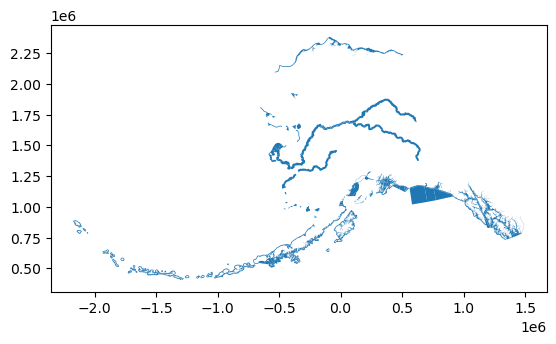

In [15]:
fishing_areas.plot()

### Data selection

We'll be working with data from the Kodiak registration area.

In [16]:
# registration areas:
print(fishing_areas.registration_area_name.unique())

['Yukon Area' 'Kuskokwim Area' 'Prince William Sound Area'
 'Bristol Bay Area' 'Chignik Area' 'Kodiak Area' 'Alaska Peninsula Area'
 'Cook Inlet Area' 'Norton Sound-Port Clarence Area'
 'Arctic-Kotzebue Area' 'Aleutian Islands Area' 'Atka-Amlia Islands Area'
 'Southeastern Alaska Area']


In [18]:
# Select kodiak

kodiak = fishing_areas[fishing_areas.registration_area_name == 'Kodiak Area']

print('# of geometries in Kodiak area',len(kodiak))

# of geometries in Kodiak area 118


## Plot of Kodiak fishing area 

One way to add a custom legend is to make a `Patch` object for each geometry in our plot.

We can make a `Patch` with a custom color and label via `mpatches.Patch()`

```python
great_patch = mpatches.Patch(color = great_color, # any way you specify a color 
                             label = 'great_label')
```
To add this patch to the legend, we should have added an axis. (by calling `fig, ax = plt.subplots()`) at the beginning of our plot. Then we add the `Patch` to our legend

```python
ax.legend(handles = [great_patch]) # makes handles = list with patch or a number of patches 
```

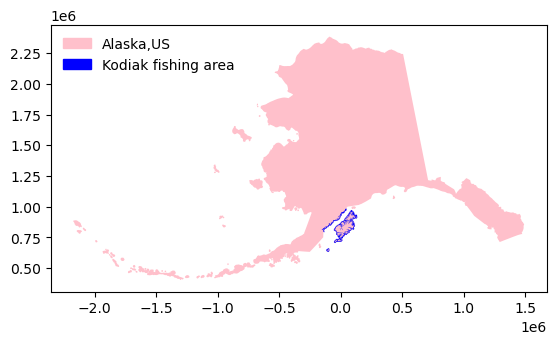

In [22]:
fig, ax = plt.subplots()
#-------------------------
ak.plot(ax = ax, color = 'pink')
ak_patch = mpatches.Patch(color = 'pink', label = 'Alaska,US')
#----------------------------
kodiak.plot(ax = ax, color = 'blue')
kodiak_patch = mpatches.Patch(color = 'blue',
                             label = 'Kodiak fishing area')

#-----------------------
# making the legend
ax.legend(handles = [ak_patch, kodiak_patch], frameon = False, loc = 'upper left')

# ------------
plt.show()

## Dissolve and explode polygons

The Kodiak data is too granular for our purposes: we want to get statistics on distance travelled on each fishing district

In [24]:
# check number of districts and rowa
print(f"number of geometries: {len(kodiak)}")
print(f"number of districts: {len(kodiak.district_name.unique())}")

number of geometries: 118
number of districts: 7


We can aggregate the geometries based on values of a column using the `dissolve()` method. 
Here we willd dissolve by district name:

In [28]:
# dissolve by district 
# as_index = False indicates we want to keep the `groupby` column as a column (not index)
districts = kodiak[['geometry','district_name']].dissolve(by = 'district_name',as_index = False)

districts

,district_name,geometry
0,Afognak District,"POLYGON ((117320.445 935905.028, 117387.891 93..."
1,Alitak Bay District,"POLYGON ((-20734.052 769618.550, -20652.681 76..."
2,Eastside Kodiak District,"MULTIPOLYGON (((-100323.045 633409.206, -10041..."
3,Mainland District,"MULTIPOLYGON (((-134659.359 791834.058, -13771..."
4,Northeast Kodiak District,"POLYGON ((113349.628 855371.323, 113490.376 85..."
5,Northwest Kodiak District,"POLYGON ((7822.482 849511.733, 7817.541 849495..."
6,Southwest Kodiak District,"POLYGON ((-31173.650 786489.038, -31165.811 78..."


We can control the legend location adding `loc` and `bbox_to_anchor` to `legend_kwds`.

It can be useful to  use both together.

`loc`: indicate the corner of the legend box we are aligning
`bbox_to_anchor`: is a tuple with coordinates of where to place the corner specified in `loc`. Values between 0 and 1 are *inside* the plot (inside the axes)

Let's take a look at the districts:

<AxesSubplot:>

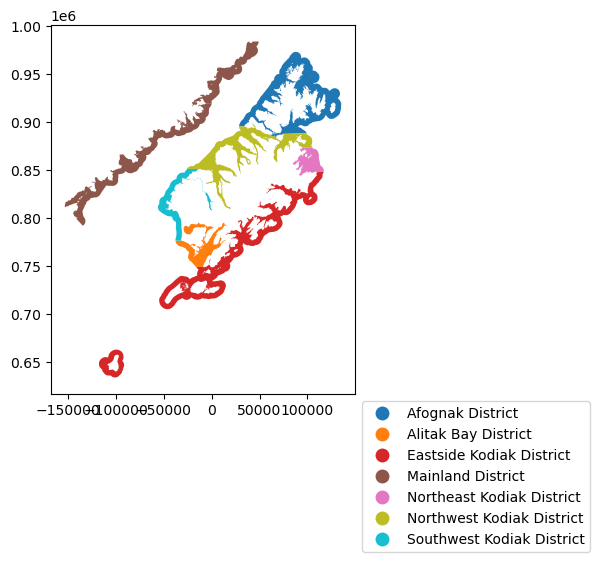

In [33]:
districts.plot(column = 'district_name',
               legend = True,
               legend_kwds = {'loc':'upper left', 'bbox_to_anchor':(1,0)})

Notice some of our districts are multipolygons. To simplify our analysis, we will separate each multipolygon into individual polygons. 

use `explode` from `gpd.GeoDataFrame`:

In [34]:
districts = districts.explode(ignore_index = True)
districts

,district_name,geometry
0,Afognak District,"POLYGON ((117320.445 935905.028, 117387.891 93..."
1,Alitak Bay District,"POLYGON ((-20734.052 769618.550, -20652.681 76..."
2,Eastside Kodiak District,"POLYGON ((-100323.045 633409.206, -100419.680 ..."
3,Eastside Kodiak District,"POLYGON ((-14244.415 714649.799, -14326.870 71..."
4,Mainland District,"POLYGON ((-134659.359 791834.058, -137719.352 ..."
5,Mainland District,"POLYGON ((-13345.174 922271.590, -13358.061 92..."
6,Northeast Kodiak District,"POLYGON ((113349.628 855371.323, 113490.376 85..."
7,Northwest Kodiak District,"POLYGON ((7822.482 849511.733, 7817.541 849495..."
8,Southwest Kodiak District,"POLYGON ((-31173.650 786489.038, -31165.811 78..."


## Distance raster preparation

### Squeeze 

First, we have an unncessary dimension, let's get rid of it:

In [37]:
raw_dist = raw_dist.squeeze().drop('band')

ValueError: One or more of the specified variables cannot be found in this dataset

In [38]:
raw_dist

<xarray.DataArray (y: 2308, x: 3087)>
[7124796 values with dtype=float32]
Coordinates:
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    _FillValue:          -3.4e+38
    scale_factor:        1.0
    add_offset:          0.0

In [40]:
print(f"After squeeze :\ndimensions {raw_dist.dims}\ncoords: {raw_dist.coords}")

After squeeze :
dimensions ('y', 'x')
coords: Coordinates:
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0


## Updating no-data value

Take a look at the data:

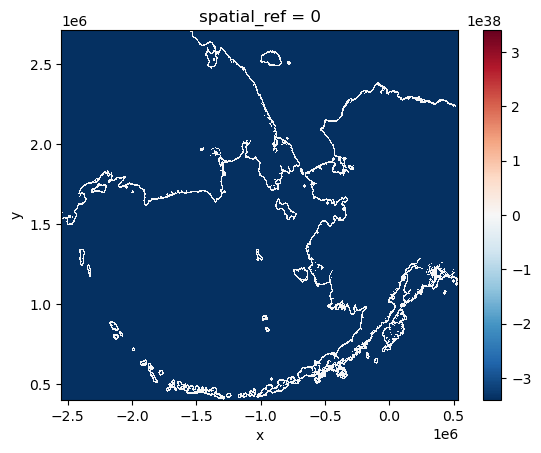

In [41]:
raw_dist.plot()

In [42]:
# check min and max values
print(f"min: {raw_dist.min()}") # calculates minimum as xarray


min: <xarray.DataArray ()>
array(-3.39999995e+38)
Coordinates:
    spatial_ref  int64 0


In [47]:
print(f"min: {raw_dist.min().item()}\n max: {raw_dist.max().item():,}")

# we can get the no data values from the raster itself
nodata = raw_dist.rio.nodata
print('no-data value',nodata)

min: -3.3999999521443642e+38
 max: 2,564,975.75
no-data value -3.4e+38


We can select all pixels where there is raster data using the `where()` method.

By default, `where()` will place `np.nan` (NAs) at every cell that does not satisfy the condition:

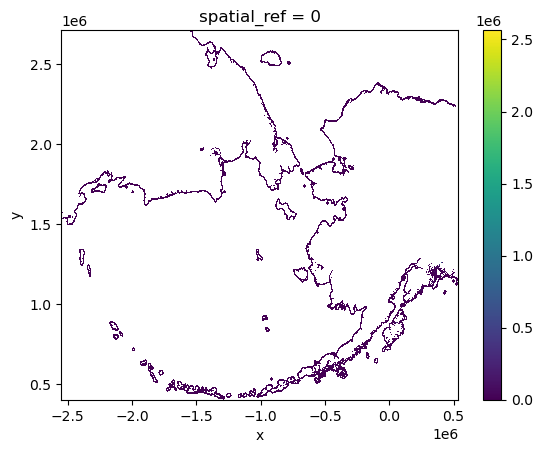

In [51]:
dist = raw_dist.where(raw_dist != nodata)
dist.plot()

## Clipping raster

In [53]:
kodiak_dist = dist.rio.clip_box(*districts.total_bounds) #coordinates of bounding box 
kodiak_dist

<xarray.DataArray (y: 352, x: 289)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x            (x) float64 -1.531e+05 -1.521e+05 ... 1.338e+05 1.348e+05
  * y            (y) float64 9.843e+05 9.833e+05 ... 6.343e+05 6.333e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          -3.4e+38

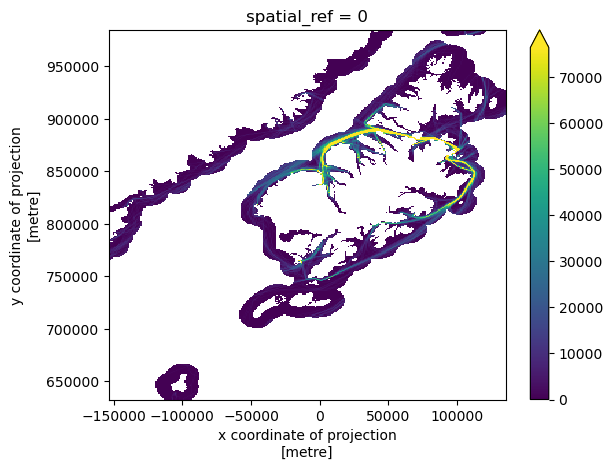

In [54]:
kodiak_dist.plot(robust = True)